# HealtNotebook 



Welcome to HeathNotebook! <br> This is a notebook for health data analysis.
First we will ask you to enter your name and age and then we will ask more about your current health.
Depending on where you are running this notebook, when you run the next cell, you will be prompted to write your name and age.

In [40]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from IPython.display import display

data = pd.read_csv("./data/data_combined_final.csv")


# remove id and country columns
data = data.drop(['id', 'country'], axis=1)

In [41]:
data.columns

Index(['Steps', 'Socialize (min)', 'Leave house', 'People contact',
       'Alcohol (bev)', 'Exercise', 'Stress', 'Worry (scale)',
       'Worry (finances)', 'Worry (health)', 'PHQ9', 'PANAS (NA)',
       'PANAS (PA)', 'Isolation', 'Latency', 'Wakes', 'Sleeptime (h)',
       'student', 'Age Group', 'Restfulness', 'Wakes (scale)', 'Nervousness',
       'Depression', 'Anxiety', 'Insomnia', 'Exercise (scale)',
       'Food Healthiness', 'Alcohol'],
      dtype='object')

In [42]:
name_value = ""
age_value = 0
hours_slept_value = 0.0
sleep_quality_value = ""
stress_value = ""
exercise_value = ""
daily_steps_value = 0
alcohol_consumption_value = 0.0
food_value = ""
socialize_minutes_value = 0
leave_house_value = ""
number_of_people_contact = 0
worry_categorical = ""
worry_finances_value = ""
worry_health_value = ""
phq9_value = 0
isolations_value = ""
latency = 0
wakes = ""
student = ""
restfulness = ""
wakes_scale = ""
nervousness = ""
depression = ""
anxiety = ""
insomnia_value = ""
exercise_scale = ""
alcohol_scale = ""


def labeled_widget(label, widget):
    return widgets.VBox([widgets.Label(label), widget], layout=widgets.Layout(align_items='stretch'))

name = widgets.Text(
    value='',
    placeholder='Type something',
    disabled=False)


age = widgets.IntText(
    value=0, 
    placeholder='Type something',
    disabled=False,
    min=0)

hours_slept = widgets.FloatText(
    value=0.0,
    placeholder='Type something',
    disabled=False,
    min=0.0,)

sleep_quality = widgets.Dropdown(
    options=["1: Yes, almost always", "2: Yes, often", "3: Rarely, or almost never"],
    value="1: Yes, almost always",
    disabled=False)

stress = widgets.Dropdown(
    options=["1: Not stressed at all", "2", "3", "4", "5", "6", "7: Cosumed by stres"],
    value = "1: Not stressed at all",
    disabled=False)

exercise = widgets.Dropdown(
    options=["Yes", "No"],
    value="Yes",
    disabled=False)

daily_steps = widgets.IntText(
    value=0, 
    placeholder=0,
    disabled=False,
    min=0)

alcohol_consumption = widgets.FloatText(
    value=0.0,
    placeholder=0.0,
    disabled=False,
    min=0.0,)

food = widgets.Dropdown(
    options=["1: Never" , "2: Yes, sometimes", "3: Often"],
    value="1: Never",
    disabled=False)

socialize_minutes = widgets.IntText(
    value=0,
    placeholder=0,
    disabled=False,
    min=0)

leave_house = widgets.Dropdown(
    options = ["1: yes ", "0: no"],
    value = "0: no",
    disabled=False)

number_of_people_contact = widgets.IntText(
    value=0,
    placeholder=0,
    disabled=False,
    min=0)

latency = widgets.IntText(
    value=0,
    placeholder=0,
    disabled=False,
    min=0)

wakes = widgets.Dropdown(
    options = ["0", "1", "2", "3", "4", "5 or more"],
    value = "0",
    disabled=False)

student = widgets.Dropdown(
    options = ["1: yes ", "0: no"],
    value = "0: no",
    disabled=False)

restfulness = widgets.Dropdown(
    options = ["1: Yes, nearly always", "2: Yes, often", "3: Seldom or hardly ever", "4: Can't say"],
    value = "1: Yes, nearly always",
    disabled=False)

wakes_scale = widgets.Dropdown(
    options = ["0: No", "1:Occationally", "2: Weekly", "3: Daily or almost daily"],
    value = "0: No",
    disabled=False)

nervousness = widgets.Dropdown(
    options = ["0: No", "1:Occationally", "2: Weekly", "3: Daily or almost daily"],
    value = "0: No",
    disabled=False)

depression = widgets.Dropdown(
    options = ["0: No", "1:Occationally", "2: Weekly", "3: Daily or almost daily"],
    value = "0: No",
    disabled=False)

anxiety = widgets.Dropdown(
    options = ['0: No', '1: Occationally', '2: Weekly','Daily or almost daily'],
    value = '0: No',
    disabled=False)

insomnia = widgets.Dropdown(
    options=["0: Not at all", "2: No more than usual", "3: Rather more than usual", "4: Much more than usual"],
    value="0: Not at all",
    disabled=False)

exercise_scale = widgets.Dropdown(
    options =  ['0: Not at all or very seldom', "1: 1-3 times a month", "2: Roughly once a week",
                "3: 2-3 times a week", "4: 4-6 times a week", "5: Daily"],
    value = "0: Not at all or very seldom",
    disabled=False)


alcohol_scale = widgets.Dropdown(
    options = ["0: Never", "1: Monthly or less often", "2: 2-3 times a month","3: Once a week", "4: 2-3 times a week", "5: Four times a week or more often"],
    value = "0: Never",
    disabled=False)




button = widgets.Button(description="Submit")

# Define a function to handle button click event
def on_button_click(b):
    global name_value, age_value, hours_slept_value, sleep_quality_value, \
    stress_value, exercise_value, daily_steps_value, alcohol_consumption_value, \
    food_value, socialize_minutes_value, leave_house_value, number_of_people_contact, \
    latency, wakes, student, restfulness, wakes_scale, nervousness, depression, \
    insomnia, exercise_scale, alcohol_scale

    name_value = name.value
    age_value = age.value
    hours_slept_value = hours_slept.value
    sleep_quality_value = int(sleep_quality.value.split(":")[0])
    if stress.value == "1: Not stressed at all" or stress.value == "7: Cosumed by stres":
        stress_value = int(stress.value.split(":")[0])
    else:
        stress_value = int(stress.value)
    exercise_value = 1 if exercise.value == "Yes" else 0
    daily_steps_value = daily_steps.value
    alcohol_consumption_value = int(alcohol_consumption.value)
    food_value = int(food.value.split(":")[0])
    socialize_minutes_value = socialize_minutes.value
    leave_house_value = int(leave_house.value.split(":")[0])
    number_of_people_contact = number_of_people_contact.value
    latency = latency.value
    if wakes.value == "5 or more":
        wakes = 5
    else:
        wakes = int(wakes.value)
    student = int(student.value.split(":")[0])
    restfulness = int(restfulness.value.split(":")[0])
    wakes_scale = int(wakes_scale.value.split(":")[0])
    nervousness = int(nervousness.value.split(":")[0])
    depression = int(depression.value.split(":")[0])
    anxiety = int(anxiety.value.split(":")[0])
    insomnia = int(insomnia.value.split(":")[0])
    exercise_scale = int(exercise_scale.value.split(":")[0])
    alcohol_scale = int(alcohol_scale.value.split(":")[0])






# Set the function to be called on button click
button.on_click(on_button_click)

# Create labeled widgets
name_labeled = labeled_widget('Name:', name)
age_labeled = labeled_widget('Age:', age)
hours_slept_labeled = labeled_widget('Hours slept on average:', hours_slept)
sleep_quality_labeled = labeled_widget('Do you feel you sleep enough?:', sleep_quality)
stress_labeled = labeled_widget('Stress, on a scale from 1 to 7:', stress)  
exercise_labeled = labeled_widget('Do you exercise:', exercise)  
daily_steps_labeled = labeled_widget('Daily steps:', daily_steps)  
alcohol_consumption_labeled = labeled_widget('Number of alcohol units:', alcohol_consumption)  
food_labeled = labeled_widget('When buying/acquiring food, do you take health factors into account?:', food)
socialize_minutes_labeled = labeled_widget('How many minutes do you spend socializing with people outside your household?:', socialize_minutes)
leave_house_labeled = labeled_widget('Do you leave the house on a daily basis?:', leave_house)
number_of_people_contact_labeled = labeled_widget('How many people do you come in contact on average on a day:', number_of_people_contact)
latency_labeled = labeled_widget('How long does it take you to fall asleep in minutes?:', latency)
wakes_labeled = labeled_widget('How many times do you wake up during the night?:', wakes)
student_labeled = labeled_widget('Are you a student?:', student)
restfulness_labeled = labeled_widget('Do you feel rested when you wake up?:', restfulness)
wakes_scale_labeled = labeled_widget('Have you experienced any the following during the past month: Waking up during the night or difficulty in falling asleep?:', wakes_scale)
nervousness_labeled = labeled_widget('Have you experienced any the following during the past month: Nervous tension/nervousness ?:', nervousness)
depression_labeled = labeled_widget('Have you experienced any the following during the past month: Depression or feeling low?', depression)
anxiety_labeled = labeled_widget('Have you experienced any the following during the past month: Anxiety?', anxiety)
insomnia_labeled = labeled_widget('Have you recently lost sleep over worry?:', insomnia)
exercise_scale_labeled = labeled_widget('How often do you take more vigorous physical exercise at \n \
                                        the minimum for 30 minutes at a time and becoming at least a bit \
                                        out of breath and sweaty (e.g. jogging/fast walking, cycling, swimming, gymnastics, ball games)? :',
                                        exercise_scale)
alcohol_scale_labeled = labeled_widget('How often do you drink alcohol?:', alcohol_scale)

display(name_labeled, age_labeled, hours_slept_labeled,
        sleep_quality_labeled, stress_labeled, exercise_labeled,daily_steps_labeled,
        alcohol_consumption_labeled, food_labeled, socialize_minutes_labeled, leave_house_labeled,
        number_of_people_contact_labeled, latency_labeled, wakes_labeled, student_labeled, restfulness_labeled,
        wakes_scale_labeled, nervousness_labeled, depression_labeled, anxiety_labeled, insomnia_labeled, exercise_scale_labeled,
        alcohol_scale_labeled,
        button)
        

Button(description='Submit', style=ButtonStyle())

In [43]:
# for testing set the values to the parameters from the form
name_value = "Test"
age_value = 20
hours_slept_value = 8.0
sleep_quality_value = 1
stress_value = 1
exercise_value = 1
daily_steps_value = 10000
alcohol_consumption_value = 0
food_value = 1

stress = 1



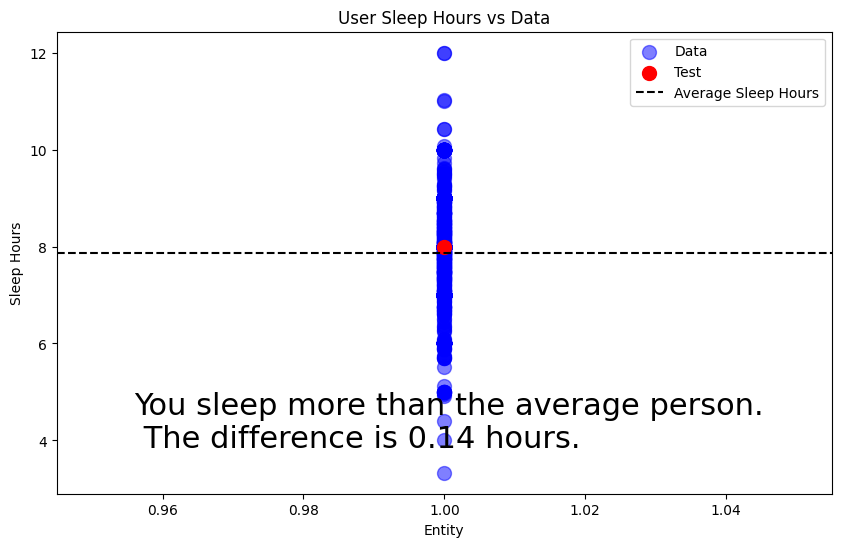

In [47]:
user_sleep_hours = hours_slept_value


# Create the plot
plt.figure(figsize=(10, 6))

x_values = np.ones(len(data['Sleeptime (h)']))
plt.scatter(x_values, data['Sleeptime (h)'], color='blue', marker='o', s=100, alpha=0.5, label='Data')

plt.scatter([1], [user_sleep_hours], color='red', marker='o', s=100, label=name_value)

# print average sleep hours as dotted line
plt.axhline(y=data['Sleeptime (h)'].mean(), color='black', linestyle='--', label='Average Sleep Hours')

plt.xlabel('Entity')
plt.ylabel('Sleep Hours')
plt.title('User Sleep Hours vs Data')
plt.legend()
y_min, y_max = plt.ylim()
x_min, x_max = plt.xlim()

# plot the text to the graph
if user_sleep_hours < data['Sleeptime (h)'].mean():
    plot_text = f"You sleep less than the average person. \n The difference is {round(data['Sleeptime (h)'].mean() - user_sleep_hours, 2)} hours."
elif user_sleep_hours == data['Sleeptime (h)'].mean():
    plot_text = f"You sleep the same amount as the average person."
else:
    plot_text = f"You sleep more than the average person. \n The difference is {round(user_sleep_hours - data['Sleeptime (h)'].mean(), 2)} hours."

plt.text(x_min + 0.1*(x_max-x_min), y_min + 0.1*(y_max-y_min), plot_text, fontsize = 22)





plt.show()

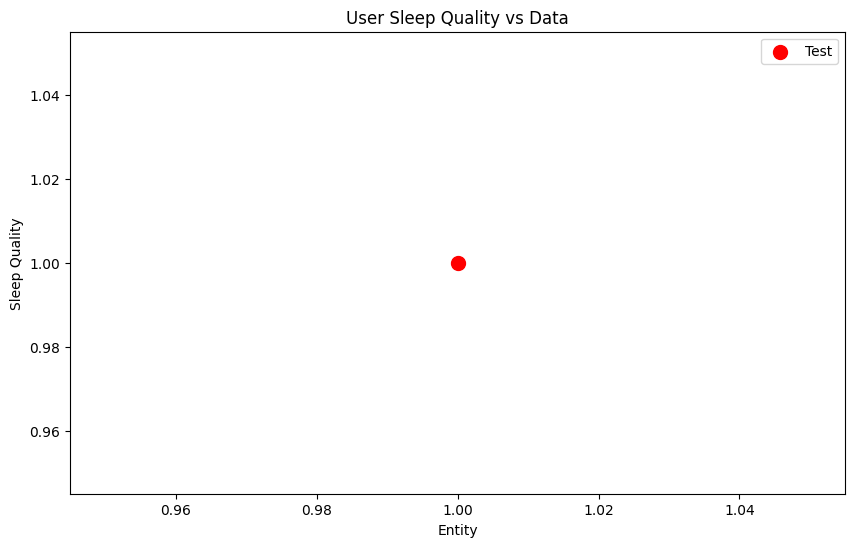

In [45]:
# plot the user's sleep quality vs the average sleep quality of the COVID data

user_sleep_quality = sleep_quality_value

plt.figure(figsize=(10, 6))

#x_values = np.ones(len(data['sleep quality']))

#create sleep quality sample data with values 1, 2, 3
x_values = np.ones(3)
x_values[0] = 1
x_values[1] = 2
x_values[2] = 3


#plt.scatter(x_values, data['sleep quality'], color='blue', marker='o', s=100, alpha=0.5, label='Data')

plt.scatter([1], [user_sleep_quality], color='red', marker='o', s=100, label=name_value)

#plt.axhline(y=data['sleep quality'].mean(), color='black', linestyle='--', label='Average Sleep Quality')

# Add labels and title
plt.xlabel('Entity')
plt.ylabel('Sleep Quality')
plt.title('User Sleep Quality vs Data')
plt.legend()




Load pre-trained models with Pickle and make predictions based on input by the user.

In [ ]:
with open('./data/models/model_sleeptime.pkl', 'rb') as f:
    model_sleeptime = pickle.load(f)

with open('./data/models/model_latency.pkl', 'rb') as f:
    model_latency = pickle.load(f)

# This model takes as inputs the step count, stress level and exercise
# These values would be given by the user
steps = 7000
stress_level = 3
exercise = 0

# Predict sleep time and latecy for the user
x = np.array([steps, stress_level, exercise])
pred_sleep = model_sleeptime.predict(x.reshape(-1 ,3))
pred_latency = model_latency.predict(x.reshape(-1, 3))
print("Predicted sleeptime", round(pred_sleep[0], 2), "(h) and predicted latency", round(pred_latency[0], 2), "(min).")

# Make another prediction with decreased stress and added exercise
# (higher stress level actually means lower stress)
x = np.array([steps, stress_level + 2, 1])
pred_sleep_alt = model_sleeptime.predict(x.reshape(-1 ,3))
pred_latency_alt = model_latency.predict(x.reshape(-1, 3))
diff_sleep = (pred_sleep_alt[0] - pred_sleep[0]) * 60
diff_latency = pred_latency[0] - pred_sleep_alt[0]
print("By moderately decresing your stress level and adding exericse to your routine you can change your sleep:")
print("Increase sleep time by", round(diff_sleep, 1), "minutes.")
print("Decrease sleep latency by", round(diff_latency, 1), "minutes.")


In [5]:
import json

def find_imports_in_notebook(notebook_path):
    with open(notebook_path, 'r') as f:
        notebook = json.load(f)

    imports = set()

    for cell in notebook['cells']:
        if cell['cell_type'] == 'code':
            for line in cell['source']:
                if line.startswith('import') or line.startswith('from'):
                    imports.add(line.strip())

    return imports

notebook_path = '../DataScienceProject/HealthNotebook.ipynb'  # Replace this with the path to your notebook
imports = find_imports_in_notebook(notebook_path)
print("Packages imported:")
for i in imports:
    print(i)


Packages imported:
import numpy as np
import pandas as pd
from IPython.display import display
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
